In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid

# Parametros
L = 60  # Tamaño del dominio (en unidades adimensionales)
N = 10000 # Numero de puntos espaciales
dx = L / N  # Paso espacial
print(dx)
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.01 # Paso temporal (en unidades adimensionales)
t_max = 6.24 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Parámetros del paquete de ondas, función de onda input
xi0 = -12 # Posición inicial partícula
kappa_0 = 20 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)
psi0_star = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(-1j * kappa_0 * xi)

# Barrera de potencial
alpha_param = 60
v_0 = 1.5  # Altura del potencial (V_0/Ec)
b = 0.75 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial
# v = v_0 * ( 1 - 1 / (1 + np.abs(xi / b)**alpha_param)) 
# v= np.zeros(N)


# Intervalo de medición de momentos
kmax = 50
kmin = 16



0.006


In [36]:
def position_difference (psi1, psi2):
    center1 = np.sum(xi * np.abs(psi1)**2) / np.sum(np.abs(psi1)**2) 
    center2 = np.sum(xi * np.abs(psi2)**2) / np.sum(np.abs(psi2)**2) 
    return np.abs (center1 - center2)


In [37]:
def perform_momentum_measurement(psi, xi, N, kmax, kmin):
   
    dx = xi[1] - xi[0]  

    a = kmin
    b = kmax

    # TF para encontrar psi en espacio de k
    psi_k = np.fft.fft(psi) * dx  # dx para normalizar al dicretizar la versión continua de TF
    k_values = np.fft.fftfreq(N, d=dx)*2*np.pi # grid del espacio de momentos

    # Producto por theta de heaviside
    positive_k_indices = (k_values > a) & (k_values < b)
    psi_k_positive = psi_k[positive_k_indices]
    
    # Conserva el tamaño del espacio
    psi_k_full = np.zeros(N, dtype=complex)
    psi_k_full[positive_k_indices] = psi_k_positive

    # Devuelve al espacio de xi
    psi_measured = np.fft.ifft(psi_k_full) # TF inversa

    # Normalizar (pendiente)
    normalization_factor = np.sqrt(trapezoid(np.abs(psi_measured)**2, xi))
    psi_measured /= normalization_factor

    return psi_measured

In [38]:


alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

diagonal_c = (1 + alpha) * np.ones(N)
off_diagonalx = -(alpha / 2) * np.ones(N - 1)
C = diags([off_diagonalx, diagonal_c, off_diagonalx], [-1, 0, 1], format="csr")

diagonal_d = (1 - alpha) * np.ones(N)
D = diags([-off_diagonalx, diagonal_d, -off_diagonalx], [-1, 0, 1], format="csr")

# C = A
# D = B





In [39]:
def calculate_positive_kappa_probability(psi, xi, kmax, kmin):

    dx = xi[1] - xi[0]
    k = np.fft.fftfreq(len(xi), d=dx) * 2 * np.pi  
    psi_k = np.fft.fft(psi) * dx                   

    positive_k_mask = (k > kmin) & (k < kmax)

    prob_positive_k = trapezoid(np.abs(psi_k[positive_k_mask])**2, k[positive_k_mask])
    

    total_prob = trapezoid(np.abs(psi_k)**2, k)
    
    
    return prob_positive_k / total_prob


In [40]:
def calculate_positive_kappa_probability(psi, xi, kmax , kmin):
    k = np.fft.fftfreq(len(xi), d=xi[1] - xi[0]) * 2 * np.pi
    psi_k = np.fft.fft(psi) * (xi[1] - xi[0])  # Fourier transform
    
    a = kmin
    b = kmax    

    positive_k_mask = (k > a) & (k < b)
    
    prob_positive_k = np.sum(np.abs(psi_k[positive_k_mask])**2)
    
    total_prob = np.sum(np.abs(psi_k)**2)
    
    return prob_positive_k / total_prob

In [41]:
def kinetic_energy(psi, xi):
    
    dx = xi[1] - xi[0]  
    d2psi_dx2 = np.gradient(np.gradient(psi, dx), dx)

    kinetic_energy = np.abs((1/kappa_0) * trapezoid(np.conjugate(psi) * d2psi_dx2, xi))
    
    return kinetic_energy

In [42]:
def potential_energy(psi, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(np.conjugate(psi) * v * psi, xi))
    
    return potential_energy

7
Initializing frame 0
Initializing frame 0
Initializing frame 0
Initializing frame 0
t = 0.070000, frame = 1


/tmp/ipykernel_21088/3929947716.py:111: RuntimeWarning: invalid value encountered in sqrt
  kappa_spread = np.sqrt(kin_ene0_spread*kappa_0)


t = 0.140000, frame = 2
t = 0.210000, frame = 3
t = 0.280000, frame = 4
t = 0.350000, frame = 5
t = 0.420000, frame = 6
t = 0.490000, frame = 7
t = 0.560000, frame = 8
t = 0.630000, frame = 9
t = 0.700000, frame = 10
t = 0.770000, frame = 11
t = 0.840000, frame = 12
t = 0.910000, frame = 13
t = 0.980000, frame = 14
t = 1.050000, frame = 15
t = 1.120000, frame = 16
t = 1.190000, frame = 17
t = 1.260000, frame = 18
t = 1.330000, frame = 19
t = 1.400000, frame = 20
t = 1.470000, frame = 21
t = 1.540000, frame = 22
t = 1.610000, frame = 23
t = 1.680000, frame = 24
t = 1.750000, frame = 25
t = 1.820000, frame = 26
t = 1.890000, frame = 27
t = 1.960000, frame = 28
t = 2.030000, frame = 29
t = 2.100000, frame = 30
t = 2.170000, frame = 31
t = 2.240000, frame = 32
t = 2.310000, frame = 33
t = 2.380000, frame = 34
t = 2.450000, frame = 35
t = 2.520000, frame = 36
t = 2.590000, frame = 37
t = 2.660000, frame = 38
t = 2.730000, frame = 39
t = 2.800000, frame = 40
t = 2.870000, frame = 41
t = 2.94

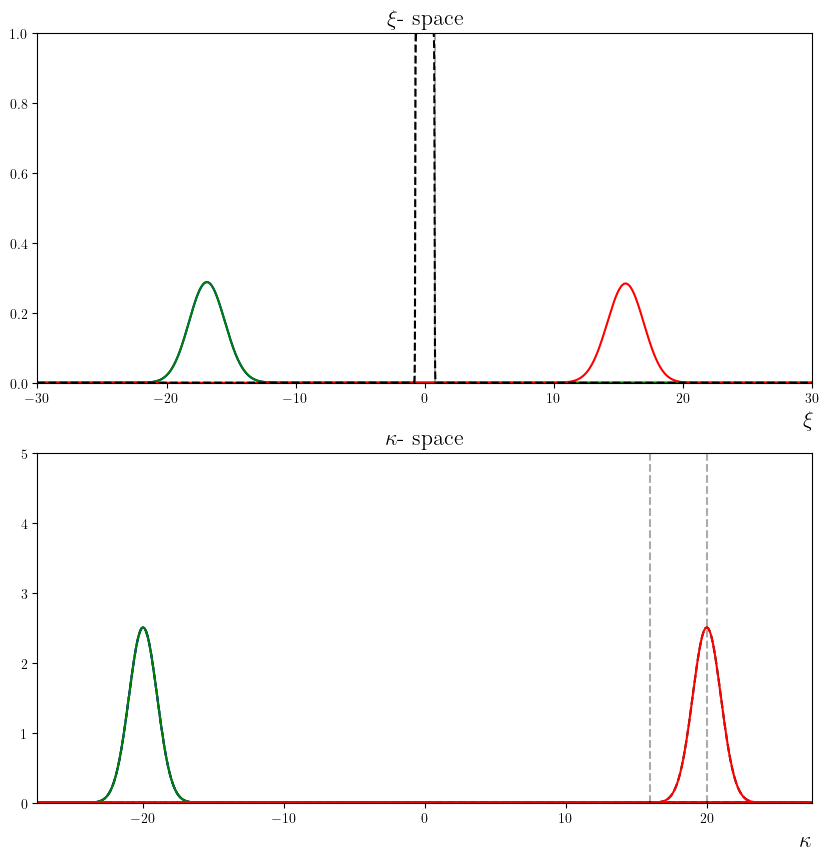

In [43]:
from matplotlib.animation import FuncAnimation 
from matplotlib import rcParams

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Transformada de Fourier para obtener psi en espacio de momentos
def psi_en_momentos(psi, k):
    psi_k = np.fft.fft(psi) * dx
    
    # # Normalizar (pendiente)
    # normalization_factor = np.sqrt(trapezoid(np.abs(psi_k)**2, k))
    # psi_k /= normalization_factor
    return psi_k

t_max = 15
t_steps = int((t_max) / dt) 
 
# Inicialización de la función de onda
psi = psi0.copy()
psiref = psi0.copy()
psiref2 = psi0.copy()

psi_evolution = []
psi_evolution_ref = []
psi_evolution_ref2 = []


num_frames = 200
steps_per_frame = t_steps // num_frames

print(steps_per_frame)

# Definir los intervalos de tiempo para hacer la medida
num_mediciones = 1

t_start = 0
t_final = t_max

if num_mediciones == 1:
    momentos_de_medicion = [t_max]  # One measurement at t_max
else:
    momentos_de_medicion = np.linspace(t_max / num_mediciones + t_start, t_final, num=num_mediciones)
    print(len(momentos_de_medicion))

# Índice para la siguiente medición
indice_medicion = 0

probs = []

# Crear figuras para los dos gráficos: espacio de posiciones y momentos
fig, (ax_pos, ax_mom) = plt.subplots(2, 1, figsize = (10,10))

# Linea para la densidad de probabilidad en posición
line_pos, = ax_pos.plot(xi, np.abs(psi)**2, color='blue')
line_pos1, = ax_pos.plot(xi, np.abs(psiref)**2, color='green', linestyle = '-', alpha = 1)
line_pos2, = ax_pos.plot(xi, np.abs(psiref2)**2, color='red', linestyle = '-', alpha = 1)
ax_pos.set_title('Densidad de probabilidad en espacio de posiciones')
ax_pos.set_ylim(0, 1)  # Ajusta esto según tus datos
ax_pos.set_xlim (-L/2,L/2)
# ax_pos.axhline(y=0.9, color='k', linestyle="--", alpha = 0.33)


# Linea para la densidad de probabilidad en momentos
k = np.fft.fftfreq(N, d=dx)*2*np.pi
psi_k = psi_en_momentos(psi,k)
psi_k1 = psi_en_momentos(psiref,k)
psi_k2 = psi_en_momentos(psiref2,k)

# Plot de la barrera
ax_pos.plot(xi, v/v_0, color='k', linestyle='--',alpha = 1 )
ax_pos.set_xlabel(r"$\xi$", fontsize = 16, loc = 'right')

# Distribucion de momento inicial
ax_mom.plot(k, np.abs(psi_k)**2, color= 'k', linestyle= '--', alpha = 1)

# Distribucion de momento final sin medidas
psi_k_star = psi_en_momentos(psi0_star,k)
ax_mom.plot(k, np.abs(psi_k_star)**2, color= 'k', linestyle= '--', alpha = 1)

line_mom, = ax_mom.plot(k, np.abs(psi_k)**2, color='blue')
line_mom1, = ax_mom.plot(k, np.abs(psi_k1)**2, color='green', linestyle= '-', alpha = 1)
line_mom2, = ax_mom.plot(k, np.abs(psi_k2)**2, color='red', linestyle= '-', alpha = 1)
ax_mom.set_title('Densidad de probabilidad en espacio de momentos')
ax_mom.set_ylim(0, 5)  # Ajusta esto según tus datos
ax_mom.set_xlabel(r"$\kappa$", fontsize = 16, loc = 'right')
ax_mom.set_xlim(-kappa_0 -7.5, kappa_0 + 7.5)

ax_pos.axvline(x=b, color='k', linestyle='--', alpha=0.33)
ax_pos.axvline(x=-b, color='k', linestyle='--', alpha=0.33)
ax_mom.axvline(x=kappa_0, color='k', linestyle='--', alpha=0.33)
# ax_mom.axvline(x=kappa_0+3.25, color='k', linestyle='--', alpha=0.33)
# ax_mom.axvline(x=kappa_0-3.25, color='k', linestyle='--', alpha=0.33)
ax_mom.axvline(x=kmin, color='k', linestyle='--', alpha=0.33)
# ax_mom.axvline(x=15, color='k', linestyle='--', alpha=0.33)
# ax_mom.axvline(x=np.sqrt(v_0)*kappa_0, color='k', linestyle='--', alpha=0.33)



p = 1
p1 = 1
p2 = 1

kin_ene0 = kinetic_energy (psi, xi)
pot_ene0 = potential_energy (psi, xi)
Etot0 = kin_ene0 + pot_ene0

kin_ene0_spread = kinetic_energy (psi, xi) - kappa_0
kappa_spread = np.sqrt(kin_ene0_spread*kappa_0)

factor = (kappa_0**3)/(kappa_0**2+kappa_spread**2)

ax_mom.axvline(x=factor*np.sqrt(v_0), color='k', linestyle='--', alpha=0.33)
T_telep = 0

i = 0

# Función para actualizar el gráfico en cada paso de tiempo
def update(frame):
    global psi, indice_medicion, p, psiref, psiref2, p1, p2, psi_evolution, psi_evolution_ref, psi_evolution_ref2, i 

    if frame == 0:
        print("Initializing frame 0")
        return line_pos, line_mom, line_pos1, line_pos2, line_mom1, line_mom2

    
    current_time = frame * steps_per_frame * dt  # Calculate current time
    

        
    print(f"t = {current_time:.6f}, frame = {frame}") 

    psi_evolution.append((current_time, np.abs(psi)**2))
    psi_evolution_ref.append((current_time, np.abs(psiref)**2))
    psi_evolution_ref2.append((current_time, np.abs(psiref2)**2))

    for _ in range(steps_per_frame):  
        # Evoluciona la función de onda varios pasos en cada cuadro
        psi = spsolve(A, B @ psi)
        psiref = spsolve(A, B @ psiref)
        psiref2 = spsolve(C, D @ psiref2)

        kin_ene = kinetic_energy (psi, xi)
        pot_ene = potential_energy (psi, xi)

        kin_eneref = kinetic_energy (psiref, xi)

        mask_trans = (xi > b) 
        mask_ref = (xi < -b)

        psi_trans = psi[mask_trans]
        psi_ref = psi[mask_ref]

        kin_ene_trans = kinetic_energy (psi_trans, xi[mask_trans])
        kin_ene_ref = kinetic_energy (psi_ref, xi[mask_ref])

        pot_ene_trans = 0
        pot_ene_ref = 0

        etot_trans = kin_ene_trans + pot_ene_trans
        etot_ref = kin_ene_ref + pot_ene_ref

        deltax = position_difference (psi, psiref)

        psi2 = np.abs(psi)**2
        centro = np.sum(xi * psi2) / np.sum(psi2)

        indice_cercano = np.argmin(np.abs(xi - centro))

        v_centro = v[indice_cercano]

        # Verificar si estamos en un momento de medida
        if indice_medicion < len(momentos_de_medicion) and current_time >= momentos_de_medicion[indice_medicion]:
            # Calcular la probabilidad para k > 0
            p = p* calculate_positive_kappa_probability(psi, xi, kmax, kmin)
            p1 = p1* calculate_positive_kappa_probability(psiref, xi, 50, -16)
            p2 = p2* calculate_positive_kappa_probability(psiref2, xi, 500, -500)
            print(p, p1, p2, current_time)
            # Realizar la medida y renormalizar el resultado por 1/sqrt(p)
            psi = (np.sqrt(p))*perform_momentum_measurement(psi, xi, N, kmax, kmin)
            psiref = (np.sqrt(p1))*perform_momentum_measurement(psiref, xi, N, 50, -16)
            psiref2 = (np.sqrt(p2))*perform_momentum_measurement(psiref2, xi, N, 500, -500)
            indice_medicion += 1  # Pasar a la siguiente medida


    # Actualizar la densidad de probabilidad en espacio de posiciones
    line_pos.set_ydata(np.abs(psi)**2)
    line_pos1.set_ydata(np.abs(psiref)**2)
    line_pos2.set_ydata(np.abs(psiref2)**2)

    # Calcular psi en el espacio de momentos y actualizar gráfica
    psi_k = psi_en_momentos(psi, k)
    line_mom.set_ydata(np.abs(psi_k)**2)

    # Ref
    psi_k1 = psi_en_momentos(psiref, k)
    line_mom1.set_ydata(np.abs(psi_k1)**2)

    # Ref2

    psi_k2 = psi_en_momentos(psiref2, k)
    line_mom2.set_ydata(np.abs(psi_k2)**2)

    # Actualizar los títulos
    ax_pos.set_title(r"$\xi$- space", fontsize = 16)
    ax_mom.set_title(r"$\kappa$- space", fontsize = 16)
    
    return line_pos, line_mom, line_pos1, line_pos2, line_mom1, line_mom2

# Crear la animación
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Guardar la animación
ani.save('animacion_con_medidas_posicion_y_momento2.mp4', writer='ffmpeg', fps=30)


In [44]:
# Convertir la lista de tuplas en una matriz (n_x, n_t)
density_matrix = np.array([density_t for _, density_t in psi_evolution]).T
density_matrix_ref = np.array([density_t for _, density_t in psi_evolution_ref]).T
density_matrix_ref2 = np.array([density_t for _, density_t in psi_evolution_ref2]).T

density_matrix_ref2



array([[3.01380944e-282, 2.15672471e-283, 8.79050529e-284, ...,
        4.66510115e-032, 2.09464202e-031, 2.13292153e-031],
       [4.64214276e-282, 9.70195799e-284, 8.05636350e-284, ...,
        9.70725120e-032, 7.64160978e-031, 7.26288807e-031],
       [7.14921973e-282, 8.54336571e-284, 6.46505528e-284, ...,
        4.87246796e-032, 1.45809562e-030, 1.25820258e-030],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.38901077e-029, 4.26331110e-029, 2.84577887e-028],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.74632649e-030, 1.95470731e-029, 1.31883693e-028],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.77869407e-030, 4.97568789e-030, 3.37956763e-029]])

In [45]:
import numpy as np
import matplotlib.pyplot as plt



# Extraer los tiempos y las posiciones
times = [t for t, _ in psi_evolution]  # Extraer los tiempos de la lista de tuplas

print(times)
positions= xi

print(positions)
# Extraer los tiempos y las posiciones
times_ref = [t for t, _ in psi_evolution_ref]  # Extraer los tiempos de la lista de tuplas
positions_ref= xi


times_ref2 = [t for t, _ in psi_evolution_ref2]  # Extraer los tiempos de la lista de tuplas
positions_ref2= xi



[0.07, 0.14, 0.21, 0.28, 0.35000000000000003, 0.42, 0.49, 0.56, 0.63, 0.7000000000000001, 0.77, 0.84, 0.91, 0.98, 1.05, 1.12, 1.19, 1.26, 1.33, 1.4000000000000001, 1.47, 1.54, 1.61, 1.68, 1.75, 1.82, 1.8900000000000001, 1.96, 2.0300000000000002, 2.1, 2.17, 2.24, 2.31, 2.38, 2.45, 2.52, 2.59, 2.66, 2.73, 2.8000000000000003, 2.87, 2.94, 3.0100000000000002, 3.08, 3.15, 3.22, 3.29, 3.36, 3.43, 3.5, 3.5700000000000003, 3.64, 3.71, 3.7800000000000002, 3.85, 3.92, 3.99, 4.0600000000000005, 4.13, 4.2, 4.2700000000000005, 4.34, 4.41, 4.48, 4.55, 4.62, 4.69, 4.76, 4.83, 4.9, 4.97, 5.04, 5.11, 5.18, 5.25, 5.32, 5.39, 5.46, 5.53, 5.6000000000000005, 5.67, 5.74, 5.8100000000000005, 5.88, 5.95, 6.0200000000000005, 6.09, 6.16, 6.23, 6.3, 6.37, 6.44, 6.51, 6.58, 6.65, 6.72, 6.79, 6.86, 6.93, 7.0, 7.07, 7.140000000000001, 7.21, 7.28, 7.3500000000000005, 7.42, 7.49, 7.5600000000000005, 7.63, 7.7, 7.7700000000000005, 7.84, 7.91, 7.98, 8.05, 8.120000000000001, 8.19, 8.26, 8.33, 8.4, 8.47, 8.54000000000000

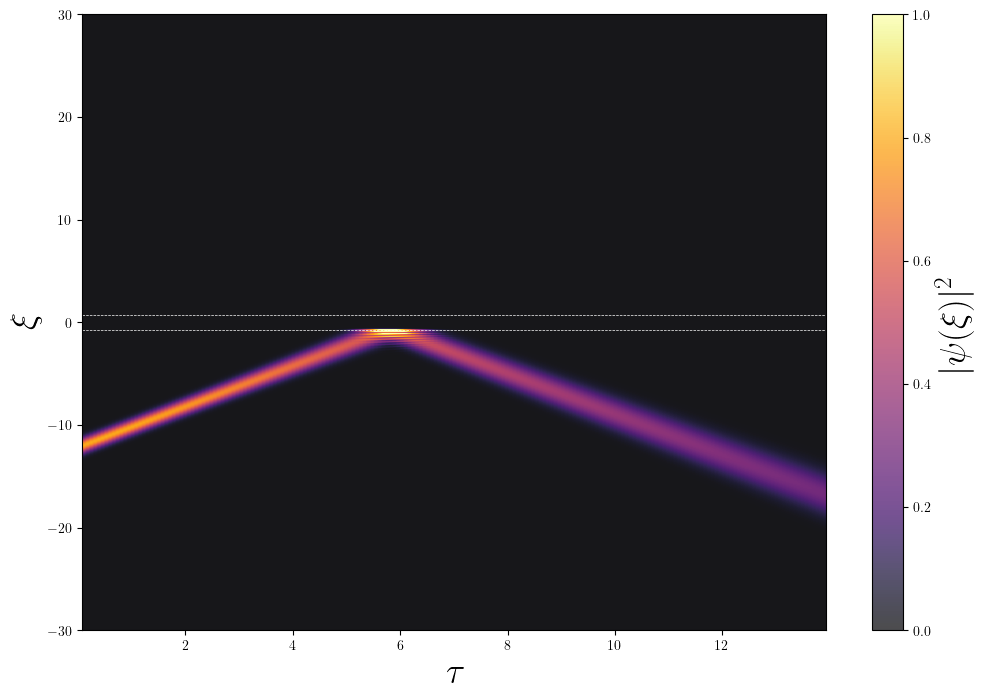

In [46]:
from matplotlib import rcParams

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Crear la figura
plt.figure(figsize=(12, 8))


# Mapa de calor para la barrera ref (colormap 'inferno' y rango consistente)
im_ref = plt.imshow(density_matrix_ref, aspect='auto', cmap='inferno', origin='lower', 
                     extent=[times_ref[0], times_ref[-1], positions_ref[0], positions_ref[-1]], 
                     alpha=0.7, vmin=0, vmax=1)

# Mapa de calor para la barrera alta (colormap 'inferno' y rango consistente)
im = plt.imshow(density_matrix, aspect='auto', cmap='inferno', origin='lower', 
                     extent=[times[0], times[-1], positions[0], positions[-1]], 
                     alpha=0.7, vmin=0, vmax=1)
plt.axhline(y=-b, color='white', linestyle='--', linewidth=0.5)
plt.axhline(y=b, color='white', linestyle='--', linewidth=0.5)
# Añadir una barra de color para cada mapa
cbar = plt.colorbar(im_ref, label=r"$|\psi(\xi)|^2$")

cbar.set_label(r"$|\psi(\xi)|^2$", fontsize=26)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize = 26)
plt.ylabel(r"$\xi$", fontsize = 26)


# Mostrar el gráfico
plt.show()


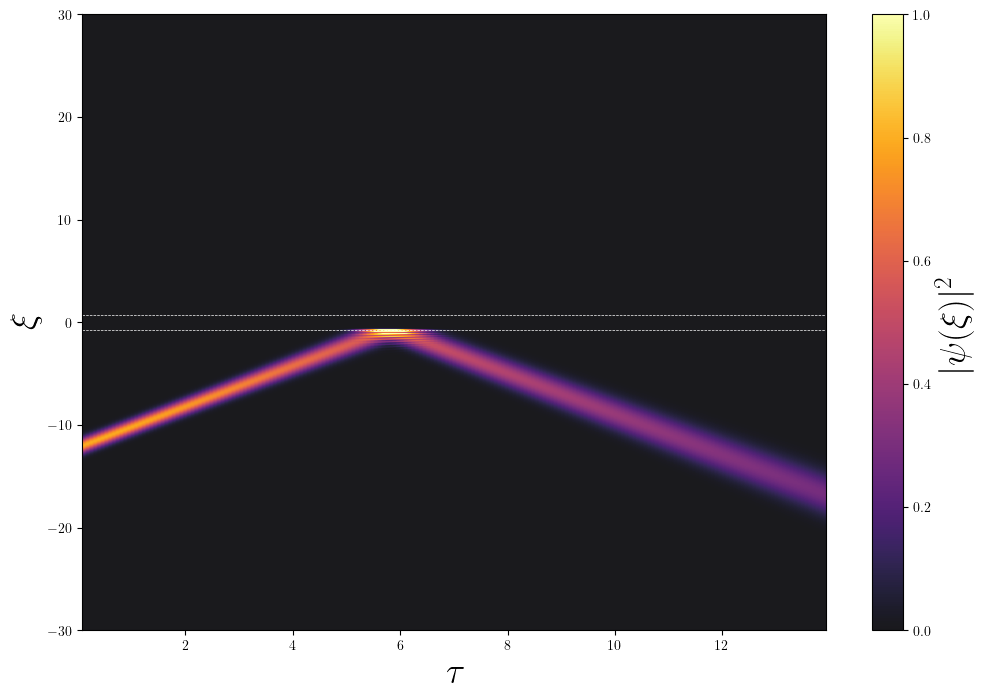

In [47]:
from matplotlib import rcParams
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib.pyplot si no lo has hecho

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Crear la figura
plt.figure(figsize=(12, 8))

# Mapa de calor para la barrera alta (colormap 'inferno' y rango consistente)
im = plt.imshow(density_matrix, aspect='auto', cmap='inferno', origin='lower', 
                extent=[times[0], times[-1], positions[0], positions[-1]], 
                alpha=0.9, vmin=0, vmax=1)

# Líneas horizontales
plt.axhline(y=-b, color='white', linestyle='--', linewidth=0.5)
plt.axhline(y=b, color='white', linestyle='--', linewidth=0.5)

# Añadir una barra de color para el mapa
cbar = plt.colorbar(im)
cbar.set_label(r"$|\psi(\xi)|^2$", fontsize=26)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize=26)
plt.ylabel(r"$\xi$", fontsize=26)

# Mostrar el gráfico
plt.show()


In [48]:

def calcular_centros_y_fwhms(matriz_psi2, x):
    
    # Inicializar arrays para los resultados
    T = matriz_psi2.shape[1]  # Número de columnas (tiempos)
    centros = np.zeros(T)
    fwhms = np.zeros(T)

    # Iterar por cada columna (cada tiempo t)
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        centro = np.sum(x * psi2) / np.sum(psi2)
        centros[i] = centro
        
        # FWHM
        max_val = np.max(psi2)
        half_max = max_val / 2
        indices = np.where(psi2 >= half_max)[0]  # Índices donde |psi|² >= mitad del máximo
        
        # Calcular FWHM
        if len(indices) >= 2:
            fwhm = x[indices[-1]] - x[indices[0]]
        else:
            fwhm = 0.0  # FWHM no definido si no hay suficientes puntos
        fwhms[i] = fwhm

    return centros, fwhms

def calcular_centros_y_fwhms(matriz_psi2, x):
    
    # Inicializar arrays para los resultados
    T = matriz_psi2.shape[1]  # Número de columnas (tiempos)
    centros = np.zeros(T)
    centros2 = np.zeros(T)
    fwhms = np.zeros(T)

    # Iterar por cada columna (cada tiempo t)
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        # dx = np.diff(x)  # Assuming x is sorted
        # centro = np.sum((x[:-1]) * psi2[:-1] * dx) / np.sum(psi2[:-1] * dx)
        centro = np.sum(x * psi2) / np.sum(psi2)
        centros[i] = centro
        
        # FWHM
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        centro2 = np.sum((x)**2 * psi2) / np.sum(psi2)
        # centro2 = np.sum((x[:-1]**2) * psi2[:-1] * dx) / np.sum(psi2[:-1] * dx)
        centros2[i] = centro2
    
    for i in range(T):
        # fwhm = np.sqrt (centros2[i]-(centros[i]**2))
        fwhm = np.sqrt (centros2[i]-centros[i]**2)
        fwhms[i] = fwhm

    return centros, fwhms



def potential_energy2(psi2, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(v* psi2, xi))
    
    return potential_energy


In [49]:

def encontrar_abscisas_cercanas(y_values, x_values, b):
    
    # Convertir las listas a arrays de numpy para facilitar el manejo de índices
    y_values = np.array(y_values)
    x_values = np.array(x_values)
    
    # Encontrar la abscisa más cercana a y = b
    idx_b = np.argmin(np.abs(y_values - b))  # Índice donde el valor de la función es más cercano a b
    
    # Encontrar la abscisa más cercana a y = -b
    idx_neg_b = np.argmin(np.abs(y_values + b))  # Índice donde el valor de la función es más cercano a -b

    # Devolver las abscisas más cercanas a b y -b
    abscisa_cercana_a_b = x_values[idx_b]
    abscisa_cercana_a_neg_b = x_values[idx_neg_b]
    
    return abscisa_cercana_a_b, abscisa_cercana_a_neg_b



# Función para hacer la extrapolación de la recta
def extrapolar_recta(x_data, y_data, num_puntos_extra=10):
    # Ajuste lineal sobre los primeros puntos (por ejemplo, los primeros 10)
    num_puntos_ajuste = 30  # Número de puntos a utilizar para el ajuste inicial
    x_ajuste = x_data[:num_puntos_ajuste]
    y_ajuste = y_data[:num_puntos_ajuste]

    # Realizar el ajuste lineal (regresión lineal)
    coeficientes = np.polyfit(x_ajuste, y_ajuste, 1)  # 1 es el grado de la recta
    pendiente, intercepto = coeficientes

    # Extrapolar la recta más allá de los datos originales
    x_extrapolado = np.linspace(x_data[0], x_data[-1] + num_puntos_extra, num_puntos_extra + len(x_data))
    y_extrapolado = pendiente * x_extrapolado + intercepto
    
    return pendiente, intercepto


def encontrar_puntos_cambio(abcisas, valores_funcion, umbral_cambio=0.1):
    # Calcular la derivada primera (pendiente) de la función
    derivada1 = np.gradient(valores_funcion, abcisas)
    
    # Calcular el cambio en la pendiente (derivada de la primera derivada)
    cambio_pendiente = np.gradient(derivada1, abcisas)
    
    # Buscar los puntos donde el cambio en la pendiente supera un umbral
    puntos_cambio = []
    for i in range(1, len(cambio_pendiente)):
        if abs(cambio_pendiente[i]) > umbral_cambio:
            # Guardar el punto y el valor de la función en ese punto de cambio
            puntos_cambio.append((abcisas[i], valores_funcion[i]))
    
    return puntos_cambio


def encontrar_puntos_cambio(abcisas, valores_funcion, umbral_cambio=0.1):
    # Calcular la derivada primera (pendiente) de la función
    derivada1 = np.gradient(valores_funcion, abcisas)
    
    # Calcular el cambio en la pendiente (derivada de la primera derivada)
    cambio_pendiente = np.gradient(derivada1, abcisas)
    
    # Buscar los puntos donde el cambio en la pendiente supera un umbral
    puntos_cambio = []
    for i in range(1, len(cambio_pendiente)):
        if abs(cambio_pendiente[i]) > umbral_cambio:
            # Guardar el punto y el valor de la función en ese punto de cambio
            puntos_cambio.append((abcisas[i], valores_funcion[i]))
    
    return puntos_cambio




199 199
[ 0.07  0.14  0.21  0.28  0.35  0.42  0.49  0.56  0.63  0.7   0.77  0.84
  0.91  0.98  1.05  1.12  1.19  1.26  1.33  1.4   1.47  1.54  1.61  1.68
  1.75  1.82  1.89  1.96  2.03  2.1   2.17  2.24  2.31  2.38  2.45  2.52
  2.59  2.66  2.73  2.8   2.87  2.94  3.01  3.08  3.15  3.22  3.29  3.36
  3.43  3.5   3.57  3.64  3.71  3.78  3.85  3.92  3.99  4.06  4.13  4.2
  4.27  4.34  4.41  4.48  4.55  4.62  4.69  4.76  4.83  4.9   4.97  5.04
  5.11  5.18  5.25  5.32  5.39  5.46  5.53  5.6   5.67  5.74  5.81  5.88
  5.95  6.02  6.09  6.16  6.23  6.3   6.37  6.44  6.51  6.58  6.65  6.72
  6.79  6.86  6.93  7.    7.07  7.14  7.21  7.28  7.35  7.42  7.49  7.56
  7.63  7.7   7.77  7.84  7.91  7.98  8.05  8.12  8.19  8.26  8.33  8.4
  8.47  8.54  8.61  8.68  8.75  8.82  8.89  8.96  9.03  9.1   9.17  9.24
  9.31  9.38  9.45  9.52  9.59  9.66  9.73  9.8   9.87  9.94 10.01 10.08
 10.15 10.22 10.29 10.36 10.43 10.5  10.57 10.64 10.71 10.78 10.85 10.92
 10.99 11.06 11.13 11.2  11.27 11.34 11.41 11

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

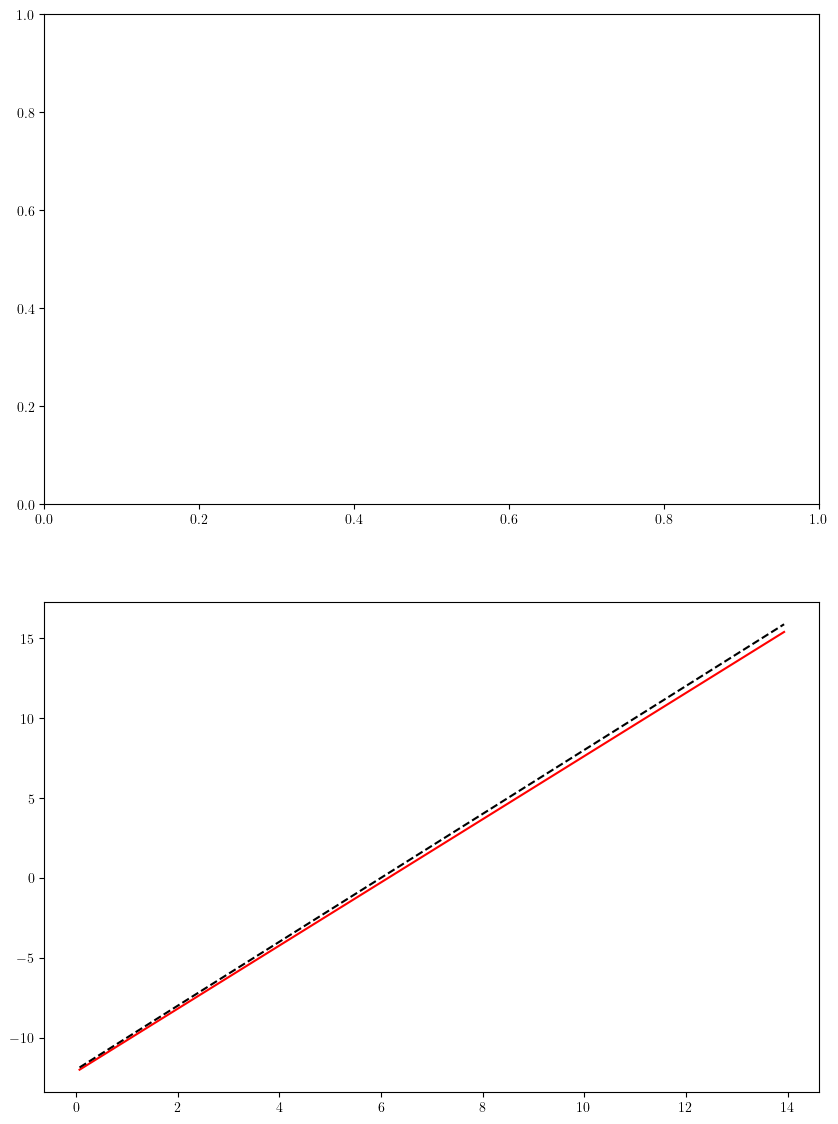

In [50]:
import matplotlib.pyplot as plt

centros, fwhms = calcular_centros_y_fwhms(density_matrix, xi)

print(len(centros), len(times))
centrosref, fwhmsref = calcular_centros_y_fwhms(density_matrix_ref, xi)

centrosref2, fwhmsref2 = calcular_centros_y_fwhms(density_matrix_ref2, xi)


# t1, t2 = encontrar_abscisas_cercanas(centros, times, b)

energies = []

T = density_matrix.shape[1]

for i in range(T):
    psi2 = density_matrix[:, i]
    energies.append(potential_energy2(psi2, xi))


pendiente1, intercepto1= extrapolar_recta(times[:30], centros[:30], num_puntos_extra=10)
pendiente2, intercepto2= extrapolar_recta(times[-50:], centros[-50:], num_puntos_extra=10)


# extrap1 = []
# extrap2 = []

# for time in times:
#     extrap1.append(pendiente1*time + intercepto1)
#     extrap2.append(pendiente2*time + intercepto2)

umbral_cambio = 0.15

# t1 = encontrar_puntos_cambio(times, centros, umbral_cambio) [0][0]
# t2 = encontrar_puntos_cambio(times, centros, umbral_cambio) [-1][0]


times = np.array (times) 
print(times)
# indice_cercano1 = np.argmin(np.abs(times - t1))
# indice_cercano2 = np.argmin(np.abs(times - t2))


# x1 = centros [indice_cercano1]
# x2 = centros [indice_cercano2]


# indice_cercano1 = np.argmin(np.abs(xi - x1))
# indice_cercano2 = np.argmin(np.abs(xi - x2))


v_0 = 2  # Altura del potencial (V_0/Ec)
b = 7.5 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial

# v1 = v[indice_cercano1]
# v2 = v[indice_cercano2]

# print(v1, v2)


# Crear figura con 3 subgráficos (1 fila y 3 columnas)
fig, axs = plt.subplots(2, 1, figsize=(10, 14))

pendiente1, intercepto = extrapolar_recta(times[-20:], centros[-20:], num_puntos_extra=10)
pendiente2, intercepto = extrapolar_recta(times[-20:], centrosref[-20:], num_puntos_extra=10)

print(pendiente1, pendiente2)

plt.title 
# Subgráfico 1: Centro en función del tiempo
# plt.plot(times, centros, label=r'$\kappa_{min}$ = 16', color='blue')
# plt.plot(times, centrosref, label=r'$\kappa_{min}$ = -16', color='green')
plt.plot(times, centrosref2, label=r"Simulation", color='red')
teo_speed = xi0+2*times
plt.plot(times, teo_speed, label=r"Analytical", color='k', linestyle = '--')
plt.set_xlabel(r"$\tau$", fontsize=26) 
plt.set_ylabel(r"$\left \langle \xi \right \rangle$", fontsize=26) 
# # plt.axhline(y=x1, color='k', linestyle='--')  
# # plt.axhline(y=x2, color='k', linestyle='--') 
# # plt.axhline(y=b, color='r', linestyle='-',alpha = 0.35  )  
# # plt.axhline(y=-b, color='r', linestyle='-', alpha = 0.35 )  
# # plt.axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  
# # plt.axvline(x=t1, color='k', linestyle='--', label=f't = {t2}')  
# # tpos, tneg = encontrar_abscisas_cercanas(centros, times, b)
# # plt.axvline(x=tpos, color='r', linestyle='-',alpha = 0.35)  
# # plt.axvline(x=tneg, color='r', linestyle='-',alpha = 0.35)  
# plt.set_xlabel(r"$\tau$", fontsize=16)
# plt.set_ylabel(r"$\left\langle x\right\rangle$", fontsize=16)
# plt.set_xlim(0, 2)
# plt.set_ylim(-12, -8)
plt.grid(True)
plt.legend()




# # Subgráfico 3: Energía en función del tiempo
# axs[2].plot(times, energies, label='Energía', color='green')
# axs[2].axhline(y=2*b, color='k', linestyle='--', label='y = 2b')  # Línea en y = 2b
# axs[2].set_xlabel('Tiempo t')
# axs[2].axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  # Línea vertical en t2
# axs[2].axvline(x=t1, color='k', linestyle='--', label=f't = {t1}')  # Línea vertical en t1
# axs[2].set_ylabel('Energía')
# axs[2].grid(True)
# axs[2].legend()



# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar todos los subgráficos
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

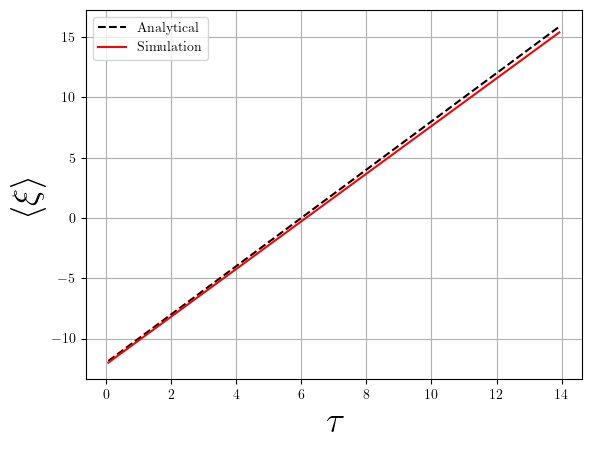

In [52]:
# Subgráfico 1: Centro en función del tiempo
# plt.plot(times, centros, label=r'$\kappa_{min}$ = 16', color='blue')
# plt.plot(times, centrosref, label=r'$\kappa_{min}$ = -16', color='green')

teo_speed = xi0+2*times
plt.plot(times, teo_speed, label=r"Analytical", color='k', linestyle = '--')
plt.plot(times, centrosref2, label=r"Simulation", color='red')
plt.xlabel(r"$\tau$", fontsize=26) 
plt.ylabel(r"$\left \langle \xi \right \rangle$", fontsize=26) 
# # plt.axhline(y=x1, color='k', linestyle='--')  
# # plt.axhline(y=x2, color='k', linestyle='--') 
# # plt.axhline(y=b, color='r', linestyle='-',alpha = 0.35  )  
# # plt.axhline(y=-b, color='r', linestyle='-', alpha = 0.35 )  
# # plt.axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  
# # plt.axvline(x=t1, color='k', linestyle='--', label=f't = {t2}')  
# # tpos, tneg = encontrar_abscisas_cercanas(centros, times, b)
# # plt.axvline(x=tpos, color='r', linestyle='-',alpha = 0.35)  
# # plt.axvline(x=tneg, color='r', linestyle='-',alpha = 0.35)  
# plt.set_xlabel(r"$\tau$", fontsize=16)
# plt.set_ylabel(r"$\left\langle x\right\rangle$", fontsize=16)
# plt.set_xlim(0, 2)
# plt.set_ylim(-12, -8)
plt.grid(True)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

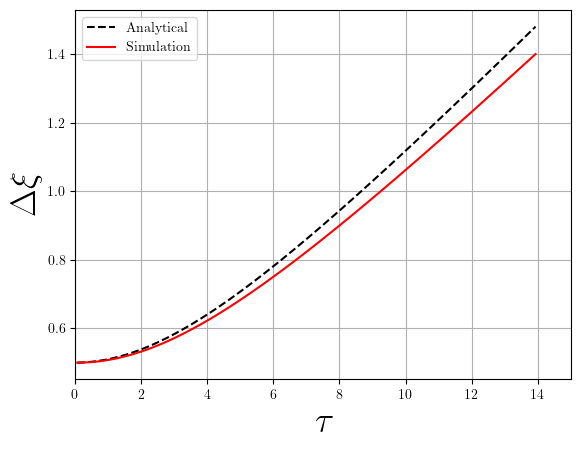

In [51]:
# Subgráfico 2: FWHM en función del tiempo
teo_fwhm = np.sqrt(1+((4/kappa_0)*times)**2)/2
plt.plot(times, teo_fwhm, label=r'Analytical', color='k', linestyle = '--')
# plt.plot(times, fwhms, label=r'$\kappa_{min}$ = 16', color='blue')
# plt.plot(times, fwhmsref, label=r'$\kappa_{min}$ = -16', color='green')
# plt.set_yscale('log')
plt.plot(times, np.abs(fwhmsref2), label=r"Simulation", color='red')
# plt.plot(times, np.abs(fwhmsref2-teo_fwhm), label="Evolución Libre", color='red')
# plt.axhline(y=2*b, color='k', linestyle='--', label='y = 2b')  # Línea en y = 2b

# ajustar recta al FWHM
pendiente, intercepto = extrapolar_recta(times, fwhms, num_puntos_extra=10)
recta = []
for time in times:  
    recta.append (pendiente*time+intercepto)


# plt.plot(times, recta, color='k', linestyle = '--', alpha = 1)
plt.xlabel(r"$\tau$", fontsize=26) 
plt.xlim(0, t_max) 
# plt.set_ylim(0.4, 0.8) 
# plt.axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  # Línea vertical en t2
# plt.axvline(x=t1, color='k', linestyle='--', label=f't = {t1}')  # Línea vertical en t1
plt.ylabel(r'$\Delta \xi$', fontsize=26)
plt.grid(True)
plt.legend()
plt.show